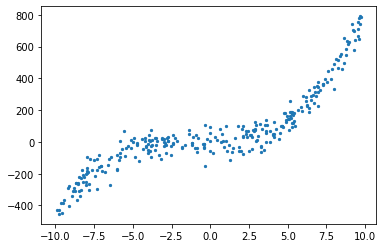

In [16]:
import numpy as np
#import pandas as np
import matplotlib.pyplot as plt
def create_poly_data(X=None, c=None, b=None, 
                     degree=3, num_points=300, 
                     X_lower=-10, X_higher=10, 
                     c_lower=-3, c_higher=3,
                     noise=True, noise_mu=0, 
                     noise_sigma=50, plot=False):
    
    def func(x, c): 
        return sum([c[i] * x**i for i in range(len(c))])
    
    if X == None: 
        X = np.random.uniform(X_lower, X_higher, num_points)
    if c == None: 
        c = [np.random.uniform(c_lower, c_higher) for _ in range(degree + 1)]
    
    y = np.array( [func(X[i], c) for i in range(num_points)] )
    
    if noise: 
        noise = np.random.normal(noise_mu, noise_sigma, num_points)
        y = [i + j for i, j in zip(y, noise)]
    
    if plot:
        plt.scatter(X, y, s = 5)
        plt.show()
        
    return X, c, y

X, c, y = create_poly_data(degree = 3, plot = True)

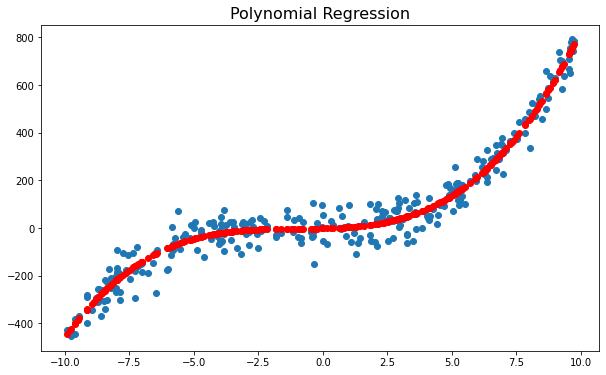

In [21]:
# importing polynomial features
from sklearn.preprocessing import PolynomialFeatures
# specifying the degree of the polynomial
poly = PolynomialFeatures(degree=3, include_bias=True)
# creating a new feature
poly_features = poly.fit_transform(X.reshape(-1, 1))
# creating a polynomial regression model

from sklearn.linear_model import LinearRegression
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y)
y_predicted = poly_reg_model.predict(poly_features)
# depicting the polynomial graph
plt.figure(figsize=(10, 6))
plt.title("Polynomial Regression", size=16)
plt.scatter(X,y)
plt.scatter(X, y_predicted, c="red")
plt.show()